# Worksheet 22

Name:  Renming Zhang    
UID: U97677301

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

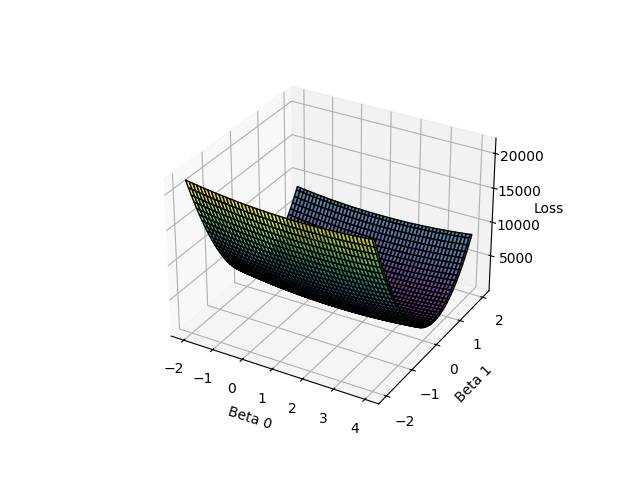

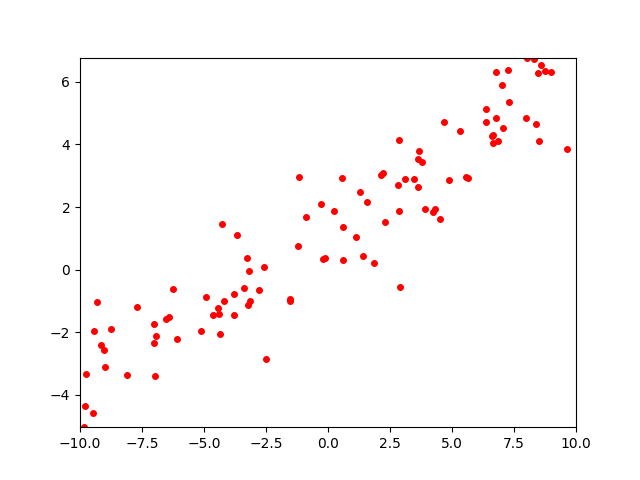

In [22]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def loss(beta, X, y):
    return np.linalg.norm(y - X.dot(beta))**2

beta = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0] + (beta[1] * xlin) + np.random.randn(100)

# Create a meshgrid of beta values for plotting
beta0_vals = np.linspace(-2, 4, 100)
beta1_vals = np.linspace(-2, 2, 100)
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
loss_vals = np.zeros_like(beta0_mesh)

# Calculate the loss for each combination of beta0 and beta1
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        beta_vals = np.array([beta0_vals[i], beta1_vals[j]])
        loss_vals[i, j] = loss(beta_vals, X, y)

# Plot the data points
fig, ax = plt.subplots()
ax.plot(xlin, y, 'ro', markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))

# Plot the loss surface in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, loss_vals.T, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_xlabel('Beta 0')
ax.set_ylabel('Beta 1')
ax.set_zlabel('Loss')

plt.show()


Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [23]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

# Generate random data for demonstration
beta = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0] + (beta[1] * xlin) + np.random.randn(100)

# Create a meshgrid of beta values for plotting
beta0_vals = np.linspace(-2, 4, 100)
beta1_vals = np.linspace(-2, 2, 100)
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
loss_vals = np.zeros_like(beta0_mesh)

# Calculate the loss for each combination of beta0 and beta1
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        beta_vals = np.array([beta0_vals[i], beta1_vals[j]])
        loss_vals[i, j] = np.linalg.norm(y - X.dot(beta_vals))**2

def loss(beta, X, y):
    return np.linalg.norm(y - X.dot(beta))**2

def gradient(X, y, beta):
    return 2 * X.T @ X @ beta - 2 * X.T @ y

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        gradient_beta = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * gradient_beta

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)

    return np.array(betas), np.array(losses)

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(beta0_mesh, beta1_mesh, loss_vals.T, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

beta_start = np.array([-5, -2])
learning_rate = 0.0002
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


c) Use the code above to create an animation of the linear model learned at every epoch.

In [24]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

TEMPFILE = "temp.png"

# Generate random data for demonstration
beta = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0] + (beta[1] * xlin) + np.random.randn(100)

# Create a meshgrid of beta values for plotting
beta0_vals = np.linspace(-2, 4, 100)
beta1_vals = np.linspace(-2, 2, 100)
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
loss_vals = np.zeros_like(beta0_mesh)

# Calculate the loss for each combination of beta0 and beta1
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        beta_vals = np.array([beta0_vals[i], beta1_vals[j]])
        loss_vals[i, j] = np.linalg.norm(y - X.dot(beta_vals))**2

def loss(beta, X, y):
    return np.linalg.norm(y - X.dot(beta))**2

def gradient(X, y, beta):
    return 2 * X.T @ X @ beta - 2 * X.T @ y

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        gradient_beta = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * gradient_beta

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)

    return np.array(betas), np.array(losses)

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(beta0_mesh, beta1_mesh, loss_vals.T, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    plt.title('Linear Regression and Gradient Descent')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

beta_start = np.array([-5, -2])
learning_rate = 0.0002
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'linear_regression_animation.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

/var/folders/ly/w4d2v1q92_s5ldnpp76xgbmh0000gn/T/ipykernel_59279/2873030014.py:65: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(min(losses), max(losses))


IndexError: index 2 is out of bounds for axis 0 with size 2

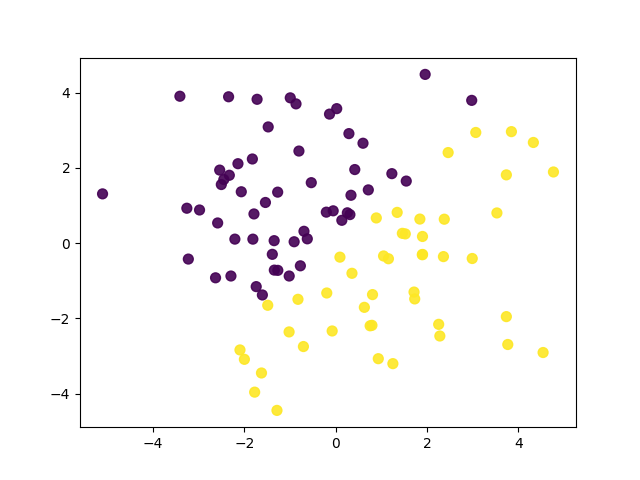

In [25]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
import sklearn.datasets as datasets

TEMPFILE = "temp.png"

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

# Extract unique colors from the scatter plot
cs = np.unique(plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.9).get_facecolors(), axis=0)

# Create a meshgrid of beta values for plotting
beta0_vals = np.linspace(-5, 4, 100)
beta1_vals = np.linspace(-5, 4, 100)
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
loss_vals = np.zeros_like(beta0_mesh)

def logistic_loss(beta, X, y):
    logits = X.dot(beta)
    log_likelihood = -np.mean(y * np.log(1 / (1 + np.exp(-logits))) + (1 - y) * np.log(1 - 1 / (1 + np.exp(-logits))))
    return log_likelihood

def logistic_gradient(X, y, beta):
    logits = X.dot(beta)
    sigmoid_probs = 1 / (1 + np.exp(-logits))
    gradient = np.mean(X * (y - sigmoid_probs)[:, np.newaxis], axis=0)
    return gradient

def gradient_descent_logistic(X, y, beta_hat, learning_rate, epochs, images):
    losses = [logistic_loss(beta_hat, X, y)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        gradient_beta = logistic_gradient(X, y, beta_hat)
        beta_hat = beta_hat + learning_rate * gradient_beta

        losses.append(logistic_loss(beta_hat, X, y))
        betas.append(beta_hat)

    return np.array(betas), np.array(losses)

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(min(losses), max(losses))

    # Creating plot
    ax.plot_surface(beta0_mesh, beta1_mesh, loss_vals.T, cmap='viridis', edgecolor='k', alpha=0.8)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

beta_start = np.array([0, 0])  # Starting point for beta values
learning_rate = 0.1
images = []
betas, losses = gradient_descent_logistic(X, y, beta_start, learning_rate, 50, images)

# Visualization of the logistic regression and data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
ax.plot(X[:, 0], -(betas[-1][0] + betas[-1][1] * X[:, 0]) / betas[-1][2], label='Logistic Regression Line', color='red')
ax.legend()
plt.show()

# Animation
images[0].save(
    'logistic_regression_animation.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


e) Plot the loss at each iteration of the gradient descent algorithm.

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"


def loss(beta, X, y):
    logits = X.dot(beta)
    log_likelihood = -np.mean(y * np.log(1 / (1 + np.exp(-logits))) + (1 - y) * np.log(1 - 1 / (1 + np.exp(-logits))))
    return log_likelihood

def gradient(X, y, beta):
    logits = X.dot(beta)
    sigmoid_probs = 1 / (1 + np.exp(-logits))
    gradient = np.mean(X * (y - sigmoid_probs)[:, np.newaxis], axis=0)
    return gradient

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(beta_hat, X, y)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        gradient_beta = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * gradient_beta

        losses.append(loss(beta_hat, X, y))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(beta0_mesh, beta1_mesh, loss_vals.T, color='b', alpha=0.7)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

# Assuming you have defined beta0_mesh and beta1_mesh earlier in your code
# beta0_mesh, beta1_mesh = ...

beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


f) Create an animation of the logistic regression fit at every epoch.

IndexError: index 2 is out of bounds for axis 0 with size 2

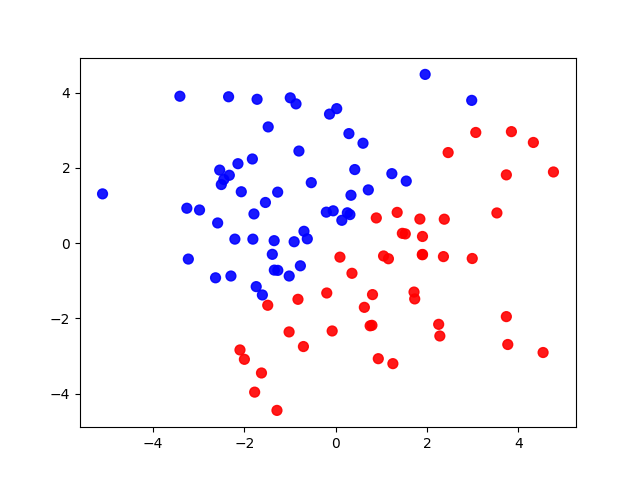

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"


def logistic_loss(beta, X, y):
    logits = X.dot(beta)
    log_likelihood = -np.mean(y * np.log(1 / (1 + np.exp(-logits))) + (1 - y) * np.log(1 - 1 / (1 + np.exp(-logits))))
    return log_likelihood

def logistic_gradient(X, y, beta):
    logits = X.dot(beta)
    sigmoid_probs = 1 / (1 + np.exp(-logits))
    gradient = np.mean(X * (y - sigmoid_probs)[:, np.newaxis], axis=0)
    return gradient

def gradient_descent_logistic(X, y, beta_hat, learning_rate, epochs, images):
    losses = [logistic_loss(beta_hat, X, y)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses, X, y))
        gradient_beta = logistic_gradient(X, y, beta_hat)
        beta_hat = beta_hat + learning_rate * gradient_beta

        losses.append(logistic_loss(beta_hat, X, y))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

def snap(betas, losses, X, y):
    # Creating figure
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=['b' if label == 0 else 'r' for label in y], s=50, alpha=0.9)

    # Plot logistic regression line
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = -(betas[-1][0] + betas[-1][1] * x_vals) / betas[-1][2]
    ax.plot(x_vals, y_vals, label='Logistic Regression Line', color='green')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

# Assuming you have defined beta0_mesh and beta1_mesh earlier in your code
# beta0_mesh, beta1_mesh = ...

beta_start = np.zeros(X.shape[1])  # Starting point for beta values
learning_rate = 0.1
images = []
betas, losses = gradient_descent_logistic(X, y, beta_start, learning_rate, 50, images)

# Animation
images[0].save(
    'logistic_regression_animation.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

IndexError: index 2 is out of bounds for axis 0 with size 2

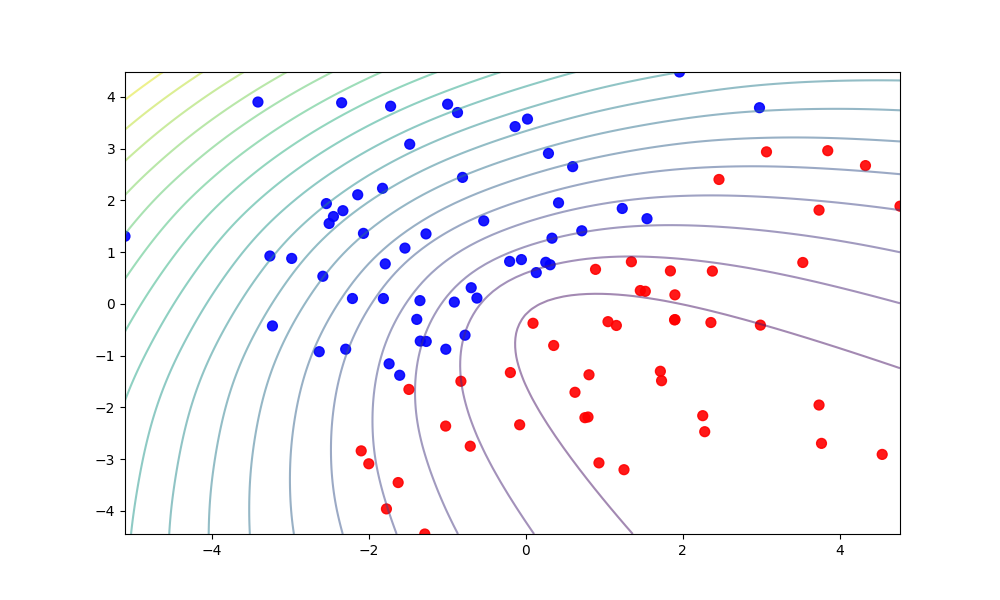

In [26]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

# Assume X and y are defined earlier in your code
# X, y = ...

def logistic_loss(beta, X, y):
    logits = X.dot(beta)
    log_likelihood = -np.mean(y * np.log(1 / (1 + np.exp(-logits))) + (1 - y) * np.log(1 - 1 / (1 + np.exp(-logits))))
    return log_likelihood

def logistic_gradient(X, y, beta):
    logits = X.dot(beta)
    sigmoid_probs = 1 / (1 + np.exp(-logits))
    gradient = np.mean(X * (y - sigmoid_probs)[:, np.newaxis], axis=0)
    return gradient

def mini_batch_gradient(X, y, beta, batch_size):
    indices = np.random.choice(len(y), size=batch_size, replace=False)
    X_batch = X[indices]
    y_batch = y[indices]
    return logistic_gradient(X_batch, y_batch, beta)

def gradient_descent_logistic(X, y, beta_hat, learning_rate, epochs, batch_size, images):
    losses = [logistic_loss(beta_hat, X, y)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses, X, y))
        gradient_beta = mini_batch_gradient(X, y, beta_hat, batch_size)
        beta_hat = beta_hat + learning_rate * gradient_beta

        losses.append(logistic_loss(beta_hat, X, y))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

def snap(betas, losses, X, y):
    # Creating figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the true loss curve
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    beta0_vals, beta1_vals = np.meshgrid(x_vals, y_vals)
    loss_vals = np.zeros_like(beta0_vals)
    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            beta_vals = np.array([beta0_vals[i, j], beta1_vals[i, j]])
            loss_vals[i, j] = logistic_loss(beta_vals, X, y)
    ax.contour(beta0_vals, beta1_vals, loss_vals, levels=20, cmap='viridis', alpha=0.5)

    # Scatter plot of the data
    ax.scatter(X[:, 0], X[:, 1], color=['b' if label == 0 else 'r' for label in y], s=50, alpha=0.9)

    # Plot logistic regression line
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = -(betas[-1][0] + betas[-1][1] * x_vals) / betas[-1][2]
    ax.plot(x_vals, y_vals, label='Logistic Regression Line', color='green')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

# Assuming you have defined beta0_mesh and beta1_mesh earlier in your code
# beta0_mesh, beta1_mesh = ...

beta_start = np.zeros(X.shape[1])  # Starting point for beta values
learning_rate = 0.1
batch_size = 10  # Adjust the batch size as needed
images = []
betas, losses = gradient_descent_logistic(X, y, beta_start, learning_rate, 50, batch_size, images)

# Animation
images[0].save(
    'logistic_regression_animation.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 1.394 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)